In [1]:
using Plots, LaTeXStrings, DualNumbers
pyplot()

Plots.PyPlotBackend()

In [2]:
"""
    ciclosestables!(xx, f, nit, nout, cc)

Esta función itera el mapeo `f`, de una variable, `nit+nout` veces, 
usando como condición inicial `x0=0`; los últimos `nout` iterados 
actualizan al vector `xx` que tiene longitud `nout`. `cc` es el valor
del parámetro del mapeo `f`. El mapeo `f` debe ser definido de 
tal manera que `f(x0,cc)` tenga sentido. La idea es los últimos 
`nout` iterados reflejen los ciclos estables del mapeo `f`. 
"""
function ciclosestables!(xx, f, nit, nout, cc)
    @assert nit > 0 && nout > 0
    
    # Primeros nit iterados
    x0 = 0.0
    for it = 1:nit
        x0 = f(x0, cc)
    end
    
    # Se guardan los siguientes nout iterados
    for it = 1:nout
        x0 = f(x0, cc)
        @inbounds xx[it] = x0
    end
    
    return nothing
end

"""
    diagbifurc(f, nit, nout, crange)

Itera el mapeo `f` `nit+nout` veces y regresa una matriz
cuya columna `i` tiene los últimos `nout` iterados del mapeo
para el valor del parámetro del mapeo `crange[i]`.

La función `f` debe ser definida de tal manera que `f(x0, c)` 
tenga sentido.
"""
function diagbifurc(f, nit, nout, crange)
    xx = Vector{Float64}(nout)
    #Lo voy a guardar en un array.
    ff = Array{Float64,2}(nout, length(crange))
    #ff = Any[]
    
    for ic in eachindex(crange)
        c = crange[ic]
        ciclosestables!(xx, f, nit, nout, c)
        
        #push!(ff, xx)
        
        ff[:,ic] = xx
        
    end
    
    return ff
end

diagbifurc (generic function with 1 method)

In [3]:
function bifurcation_function(x0, n, range_r, k)
    
    orbit = Float64[]
    r_par = Float64[]
    
    for r in range_r
        
        solution = [x0]
        #steps = Int[0]
        x_old = x0
        
        for j in 1:n
            
            x_new = x_old^2 + r
            x_old = x_new
            
        end
        
        for i in 1:k

            x_new = x_old^2 + r
            push!(solution, x_new)
            #push!(steps, i)
            x_old = x_new

        end
            
        #deleteat!(solution, 1:k) #Remove the transient.
        rs = similar(solution)
        
        for i in 1:length(solution)
            
            rs[i] = r
            
        end
        
        append!(orbit, solution)
        append!(r_par, rs)
        
    end
    
    return r_par, orbit
    
end

bifurcation_function (generic function with 1 method)

$$f(x) = x^2 +c$$


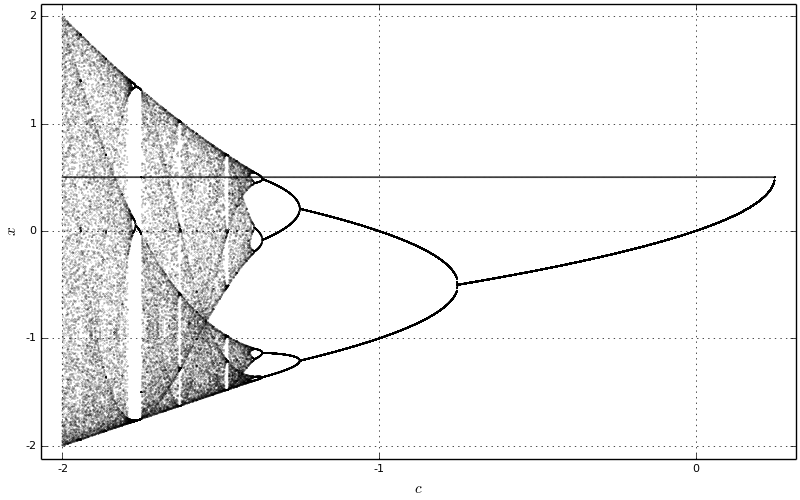

In [115]:
c_parametro, orbita = bifurcation_function(0.5, 1000, -2.0:1e-3:.25, 50)
scatter(c_parametro,orbita, markersize=0.1, c=:black, leg=false, grid=true, xaxis=(L"c"), yaxis=(L"x"), size=(800,500))

In [5]:
function iterator(f::Function, n::Int, k, x0, c)

    solution = Float64[]
    #steps = Int[0]
    x_old = x0
    for i in 1:n

        x_new = f(x_old, c)
        x_old = x_new

    end
    for i in 1:k
        
        x_new = f(x_old, c)
        push!(solution, x_old)
        x_old = x_new

    end
    
    return solution

end

iterator (generic function with 1 method)

In [6]:
function itera_funcion_anonym(n)
    
    x = "x^2 + c"

    for i in 1:n-1

        x = "($x)^2 +c"

    end

    ex = parse(x)
    ex_ret = :( (x, c) -> $ex )
    eval(ex_ret)
end 

function itera_funcion_anonym_p(n)
    
    x = "x^2 + c"

    for i in 1:n-1

        x = "($x)^2 +c"

    end

    ex = parse(x)
    ex_ret = :( (x, c) -> $ex )
    ex_ret
end 

itera_funcion_anonym_p (generic function with 1 method)

In [7]:
itera_funcion_anonym(2)

(anonymous function)

In [8]:
nombre(n::Int) = symbol( string("F_", n) )


nombre (generic function with 1 method)

In [9]:
"""
    compute_roots_paso(f::Function, x0, c)
"""
function compute_roots_paso(f::Function, x0, c)
            
            xi = Dual(x0, 1)

            # 1000 iterations of Newton's method
    for i in 1:1000

        x_2 = realpart(xi) - (realpart(f(xi, c)) - realpart(xi)) / (dualpart(f(xi, c)) - 1)
        xi = Dual(x_2, 1)
    end

    realpart(xi)
end

compute_roots_paso (generic function with 1 method)

In [10]:
f(x, c) = x^2 + c

f (generic function with 1 method)

In [11]:
for i in 1:16
    eval(itera_funcion_anonym(i))
end

## c = -0.5 n = 0

In [12]:
x_1 = iterator(f, 1000, 1, 0.0, -0.5)

1-element Array{Float64,1}:
 -0.366025

In [13]:
x_1 = compute_roots_paso(itera_funcion_anonym(1), x_1[1], -0.5)

-0.36602540378443865

In [14]:
x_1_e = itera_funcion_anonym(1)(x_1, -0.5)

-0.36602540378443865

In [15]:
abs(x_1 - x_1_e)

0.0

## c = -0.77, n = 2

In [16]:
# donde quiebra
x_1_p = iterator(f, 10000, 1, 0.0, -0.74)

1-element Array{Float64,1}:
 -0.494987

In [17]:
xx_1 = compute_roots_paso(itera_funcion_anonym(1), x_1_p[1], -0.74)

-0.49498743710661997

In [18]:
x_1_p - xx_1

1-element Array{Float64,1}:
 1.55431e-15

In [19]:
abs(x_1_p[1] - xx_1) > 1e-14

false

In [20]:
compute_roots_paso(itera_funcion_anonym(2), x_1_p[1], -0.75)

-0.4999980926989679

In [21]:
x_1_q = itera_funcion_anonym(1)(x_1_p, -0.74)

LoadError: LoadError: MethodError: `*` has no method matching *(::Array{Float64,1}, ::Array{Float64,1})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
  *{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},S}(!Matched::Union{DenseArray{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},2},SubArray{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},2,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD}}, ::Union{DenseArray{S,1},SubArray{S,1,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD}})
  *{TA,TB}(!Matched::Base.LinAlg.AbstractTriangular{TA,S<:AbstractArray{T,2}}, ::Union{DenseArray{TB,1},DenseArray{TB,2},SubArray{TB,1,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD},SubArray{TB,2,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD}})
  ...
while loading In[21], in expression starting on line 1

In [22]:
abs(x_1_p - x_1_q)

LoadError: LoadError: UndefVarError: x_1_q not defined
while loading In[22], in expression starting on line 1

## c = -1.0, n = 2

In [23]:
x_2 = iterator(f, 10000, 1, 0.0, -1.1)

1-element Array{Float64,1}:
 0.091608

In [24]:
compute_roots_paso(itera_funcion_anonym(4), x_2[1], -1.1)

0.0916079783099617

In [25]:
x_2 = compute_roots_paso(itera_funcion_anonym(4), x_2[1], -1.1)

0.0916079783099617

In [26]:
x_2_p = itera_funcion_anonym(2)(x_2[1], -1.1)

0.0916079783099617

In [27]:
abs(x_2_p - x_2)

0.0

## c = -1.3, n = 4

In [28]:
x_3 = iterator(f, 10000, 1, 0.0, -1.37)

1-element Array{Float64,1}:
 -0.0526152

In [29]:
x_3 = compute_roots_paso(itera_funcion_anonym(4), x_3[1], -1.37)

-0.08600452789268666

In [30]:
itera_funcion_anonym(4)(x_3, -1.37)

-0.08600452789268664

## c = -1.38, n = 8

In [31]:
x_4 = iterator(f, 1000, 1, 0.0, -1.38)

1-element Array{Float64,1}:
 -0.00505829

In [32]:
x_4 = compute_roots_paso(itera_funcion_anonym(8), x_4[1], -1.38)

-0.005058291015618721

In [33]:
abs(itera_funcion_anonym(8)(x_4[1], -1.38) - x_4)

0.0

In [203]:
function find_bifurcation(FF, CC)
    
    bifurcaciones = Any[]
    #eval(itera_funcion(1))
    n = 0
    
    for i in 1:length(FF)
        
        #Q_n = eval(itera_funcion(n))
        
        #x_i = compute_roots_paso(itera_funcion_anonym(2^n), FF[i], CC[i])
        x_i = FF[i]
        x_e = itera_funcion_anonym(2^n)(x_i, CC[i])
            
        if abs(x_i - x_e) > 1e-7
            
            n += 1
            push!(bifurcaciones, [CC[i], 2^n])
            
        end
        
    end
    
    bifurcaciones
    
end     

find_bifurcation (generic function with 1 method)

In [120]:
1/2^14 > 0.0001

false

In [207]:
crange = -0.73:-1/2^15:-1.4012

ff = diagbifurc(itera_funcion_anonym(1), 50000, 1, crange); 
cc = ones(size(ff)[1])*crange';

In [208]:
ff

1x21994 Array{Float64,2}:
 -0.489949  -0.489965  -0.48998  -0.489996  …  -1.39992  -1.39996  -1.39991

In [199]:
ff

1x11489 Array{Float64,2}:
 -0.474679  -0.474711  -0.474742  -0.474773  …  -1.39987  -1.39992  -1.39996

In [209]:
a = find_bifurcation(ff, cc)

9-element Array{Any,1}:
 [-0.749775390625,2.0]     
 [-1.2498974609375,4.0]    
 [-1.3680615234375,8.0]    
 [-1.394031982421875,16.0] 
 [-1.399647216796875,32.0] 
 [-1.40083740234375,64.0]  
 [-1.401112060546875,128.0]
 [-1.401142578125,256.0]   
 [-1.401173095703125,512.0]

In [154]:
a = find_bifurcation(ff, cc) #1/2^15

9-element Array{Any,1}:
 [-0.749755859375,2.0]     
 [-1.249908447265625,4.0]  
 [-1.368072509765625,8.0]  
 [-1.39404296875,16.0]     
 [-1.399627685546875,32.0] 
 [-1.400848388671875,64.0] 
 [-1.401092529296875,128.0]
 [-1.401153564453125,256.0]
 [-1.40118408203125,512.0] 

![nombre](https://s21.postimg.org/9yvekcpaf/Captura_de_pantalla_2016_10_09_a_las_3_44_20_p_m.png)

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}


In [138]:
n = 2
(a[n][1] - a[n+1][1])/(a[n+1][1] - a[n+2][1])

4.555294117647059

In [149]:
n = 5
(a[n-1][1] - a[n-2][1])/(a[n][1] - a[n-1][1])

4.619565217391305

In [150]:
function feigenbaum_const(A)
    ratio = Float64[]
    
    for i in 3:length(A)
        
        r = (a[i-1][1] - a[i-2][1])/(a[i][1] - a[i-1][1])
        push!(ratio, r)
        
    end
    
    ratio
    
end 

feigenbaum_const (generic function with 1 method)

In [210]:
feigenbaum_const(a)

7-element Array{Float64,1}:
 4.23244
 4.54994
 4.625  
 4.71795
 4.33333
 9.0    
 1.0    

In [128]:
length(a)

8

--------

In [174]:
function find_bifurcation_roots(FF, CC)
    
    bifurcaciones = Any[]
    #eval(itera_funcion(1))
    n = 0
    
    for i in 1:length(FF)
        
        #Q_n = eval(itera_funcion(n))
        
        #x_i = compute_roots_paso(itera_funcion_anonym(2^n), FF[i], CC[i])
        x_i = FF[i]
        x_e = compute_roots_paso(itera_funcion_anonym(2^n), FF[i], CC[i])
            
        if abs(x_i - x_e) > 1e-15
            
            push!(bifurcaciones, [CC[i], 2^n])
            n += 1
            
        end
        
    end
    
    bifurcaciones
    
end     

find_bifurcation_roots (generic function with 2 methods)

In [39]:
#find_bifurcation_roots(ff, cc)

In [54]:
0.001 > 0.0009

true

In [65]:
crange = 0.25:-0.001:-1.41

ff = diagbifurc(itera_funcion_anonym(1), 50000, 1, crange); 
cc = ones(size(ff)[1])*crange';

In [67]:
find_bifurcation_roots(ff, cc, 0)

10-element Array{Any,1}:
 [0.25,1.0]    
 [-0.75,2.0]   
 [-1.25,4.0]   
 [-1.368,8.0]  
 [-1.4,16.0]   
 [-1.401,32.0] 
 [-1.402,64.0] 
 [-1.403,128.0]
 [-1.404,256.0]
 [-1.405,512.0]

In [60]:
crange = -1.36:-0.0001:-1.40

ff = diagbifurc(itera_funcion_anonym(1), 50000, 1, crange); 
cc = ones(size(ff)[1])*crange';

In [61]:
ff

1x401 Array{Float64,2}:
 -1.35463  -1.35471  -1.35479  -1.35488  …  -1.3994  -1.39942  -1.39946